In [1]:
# Import libraies

import pandas as pd

from sklearn import datasets

import json

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [2]:
#Import Test Dataset

X_new = pd.DataFrame.from_dict({"0":{"0":0.6964691856},"1":{"0":0.286139335},"2":{"0":0.2268514536},"3":{"0":0.5513147691},"4":{"0":0.7194689698},"5":{"0":0.4231064601},"6":{"0":0.9807641984},"7":{"0":0.6848297386},"8":{"0":0.4809319015},"9":{"0":0.3921175182},"10":{"0":0.3431780162},"11":{"0":0.7290497074},"12":{"0":0.4385722447},"13":{"0":0.0596778966},"14":{"0":0.3980442553},"15":{"0":0.7379954057}})

# Import JSON Data

dataset = pd.read_json('votes.json')

# Numerical EDA

print(dataset.head())



        party  infants  water  budget  physician  salvador  religious  \
0  republican        0      1       0          1         1          1   
1  republican        0      1       0          1         1          1   
2    democrat        0      1       1          0         1          1   
3    democrat        0      1       1          0         1          1   
4    democrat        1      1       1          0         1          1   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0          0    0        0            1         0          1          1   
1          0    0        0            0         0          1          1   
2          0    0        0            0         1          0          1   
3          0    0        0            0         1          0          1   
4          0    0        0            0         1          0          1   

   crime  duty_free_exports  eaa_rsa  
0      1                  0        1  
1      1                  0     

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

In [4]:
print(dataset.describe())

          infants       water      budget   physician    salvador   religious  \
count  435.000000  435.000000  435.000000  435.000000  435.000000  435.000000   
mean     0.429885    0.558621    0.606897    0.406897    0.521839    0.650575   
std      0.495630    0.497123    0.489002    0.491821    0.500098    0.477337   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        satellite         aid     missile  immigration    synfuels  \
count  435.000000  435.000000  435.000000   435.000000  435.000000   
mean     0.581609    0.590805    0.526437     0.512644    0.344828   
std      0.493863    0.492252    0.499876     0.500416    0.

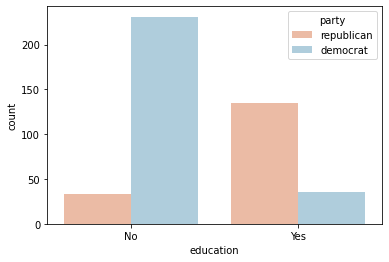

In [5]:
# Visual EDA

plt.figure()
sns.countplot(x = 'education', hue = 'party', data = dataset, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [6]:
# Fit a k-Nearest neighbors classifier

Y = dataset['party'].values

X = dataset.drop('party', axis = 1).values

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=6)

In [7]:
# Predict k-Nearest neighbors with training data set

y_pred = knn.predict(X)

new_prediction = knn.predict(X_new)

print("Prediction: {}".format(new_prediction)) 

Prediction: ['democrat']


C:\Users\woldu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [8]:
#Check model accuracy with test data set

digits = datasets.load_digits()

X = digits.data

Y = digits.target

X_train,X_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.9833333333333333
